In [1]:
# !pip install mne

In [2]:
%matplotlib notebook
import mne
import matplotlib.pyplot as plt

In [3]:
# Read the raw data
# Source: https://github.com/jona-sassenhagen/mne_workshop_amsterdam/blob/master/oddball_example_small-fif.gz
raw = mne.io.read_raw_fif('oddball_example_small-fif.gz', preload=True) # preload is necessary as mne does not store raw and epocs in memory

Opening raw data file oddball_example_small-fif.gz...


C:\Users\eraym\AppData\Local\Temp/ipykernel_9588/2389455418.py:3: RuntimeWarning: This filename (oddball_example_small-fif.gz) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('oddball_example_small-fif.gz', preload=True) # preload is necessary as mne does not store raw and epocs in memory


Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


In [4]:
dir(raw) # to see methods can be appliable

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_raw_file',
 '_read_segment',
 '

In [6]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.4s finished


<Raw | oddball_example_small-fif.gz, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>


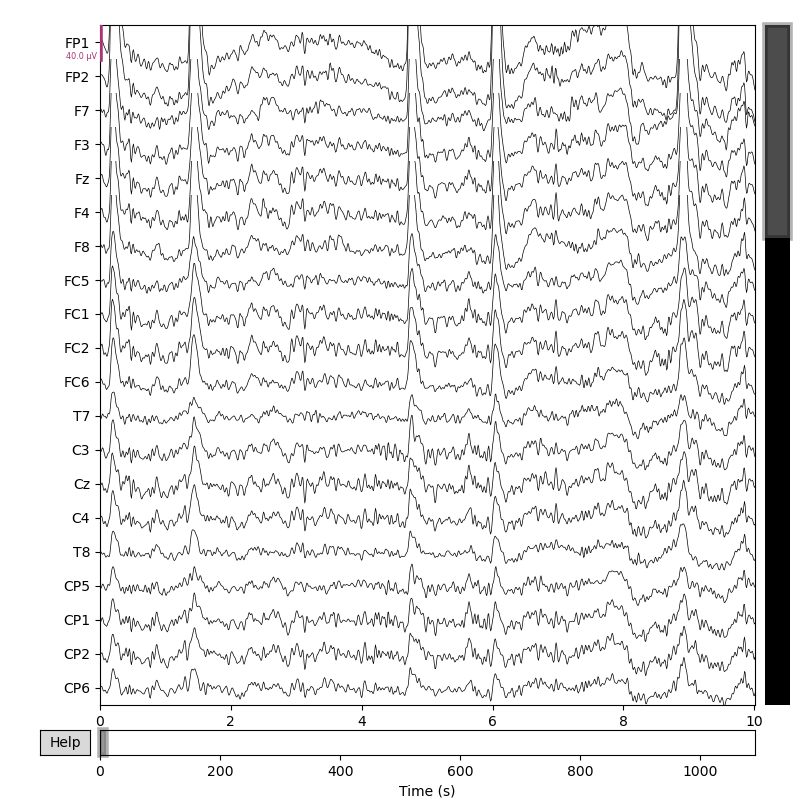

<IPython.core.display.Javascript object>


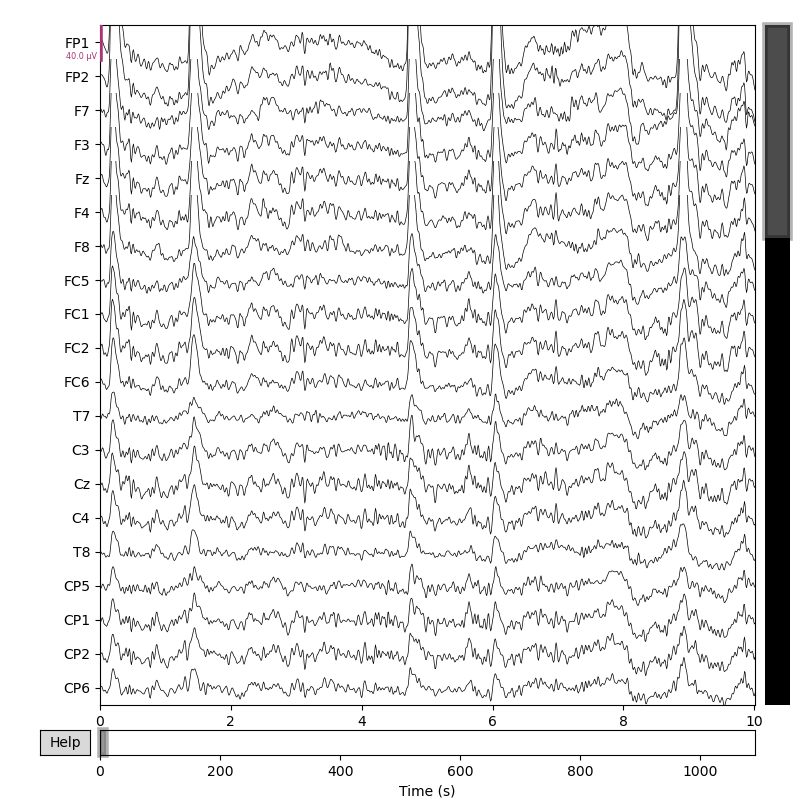

In [7]:
raw.plot()

In [8]:
# Use ICA for artefacts
ica = mne.preprocessing.ICA(n_components=20, random_state=51)

In [9]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 63 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.7s finished


Selecting by number: 20 components
Fitting ICA took 3.3s.


<ICA | raw data decomposition, method: fastica (fit in 37 iterations on 109098 samples), 20 ICA components explaining 98.9 % of variance (63 PCA components available), channel types: eeg, no sources marked for exclusion>

<IPython.core.display.Javascript object>


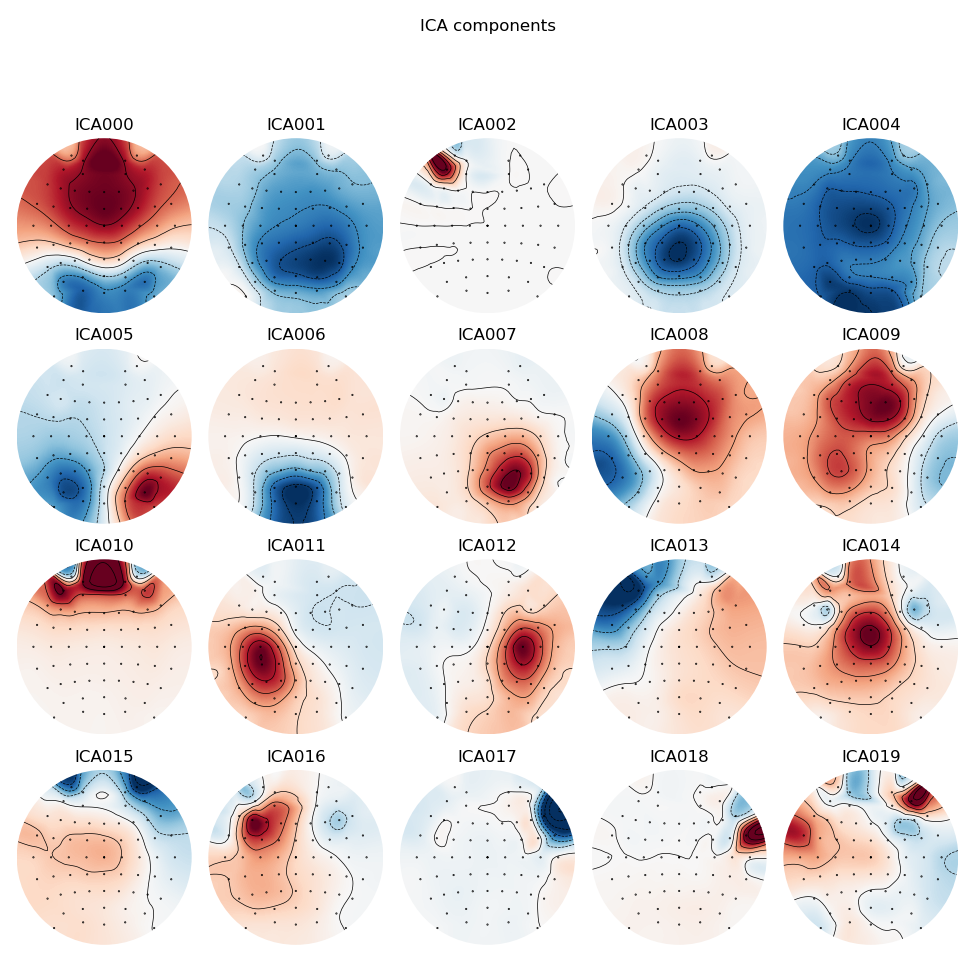

[<MNEFigure size 975x967 with 20 Axes>]

In [10]:
ica.plot_components(outlines='skirt')

In [11]:
# Store bas components in the ica objet
ica.exclude = [1, 10, 14, 17, 18, 19]

In [12]:
# Also can be found automaticly
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold=2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


<IPython.core.display.Javascript object>


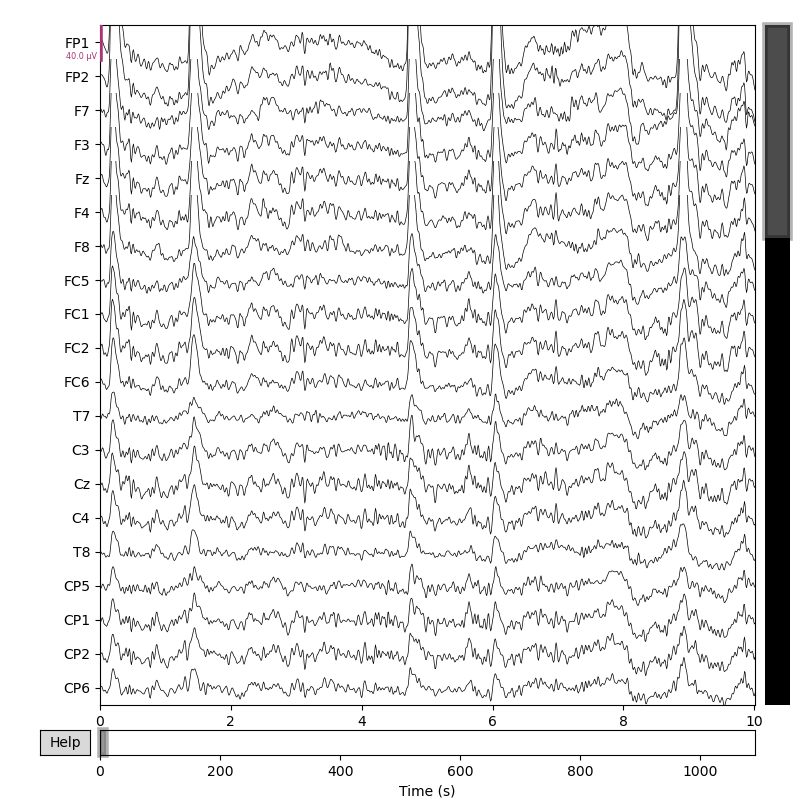

<IPython.core.display.Javascript object>


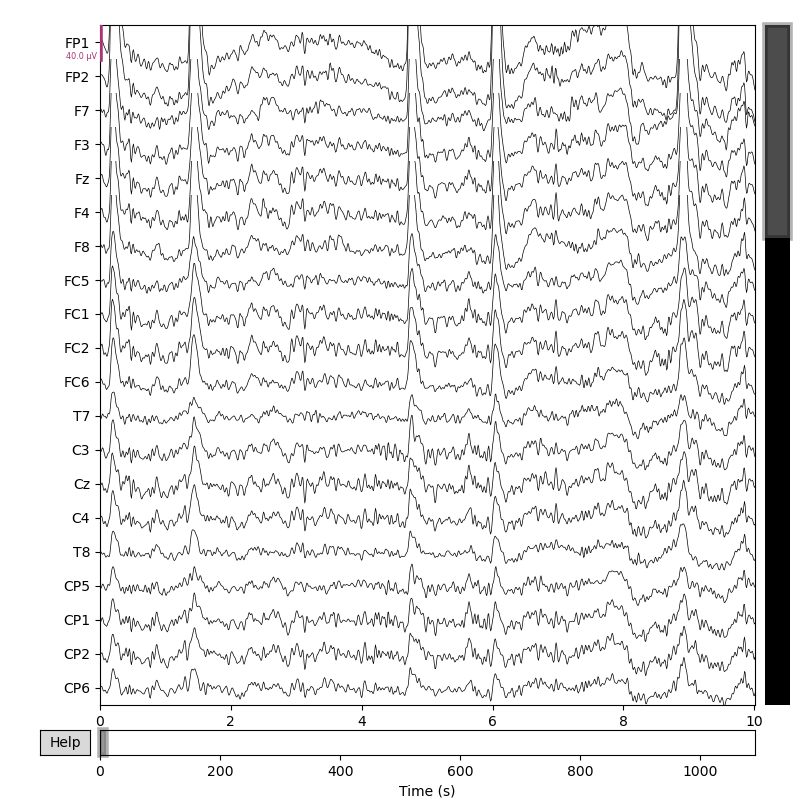

In [13]:
raw.plot()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


<IPython.core.display.Javascript object>


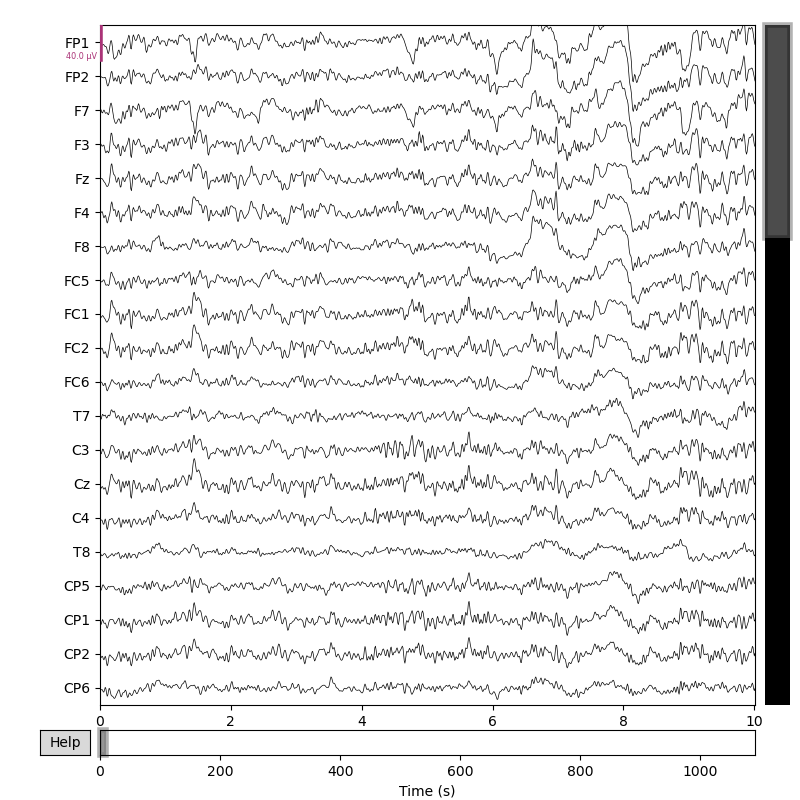

<IPython.core.display.Javascript object>


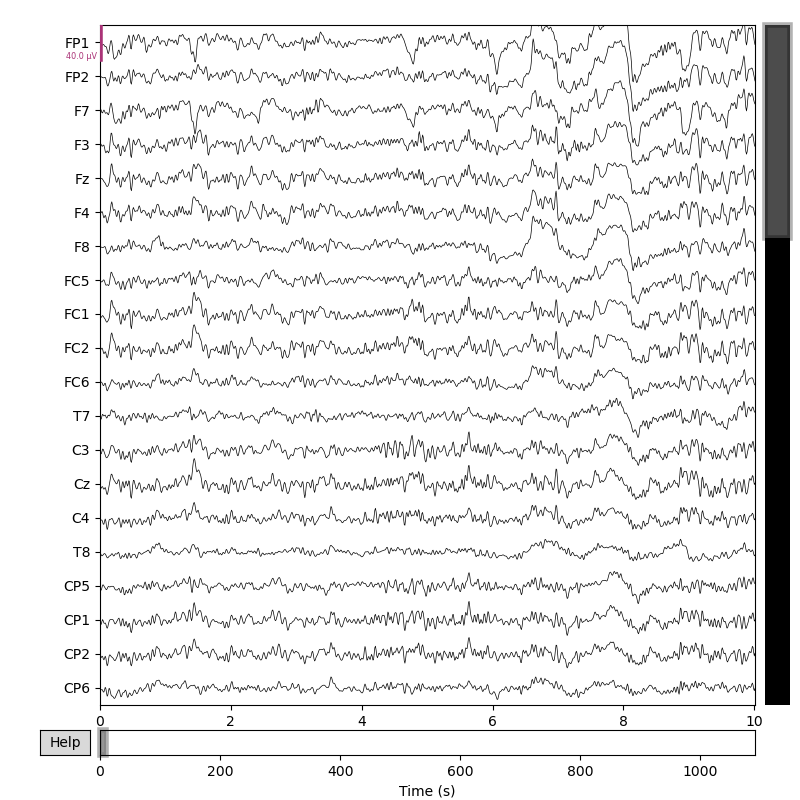

In [14]:
ica.apply(raw.copy(), exclude=ica.exclude).plot()

In [15]:
# Epochs (need event markers)
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


In [16]:
events

array([[  3241,      0,    200],
       [  3437,      0,    200],
       [  3643,      0,    200],
       ...,
       [111496,      0,    200],
       [111613,      0,    200],
       [111719,      0,    200]], dtype=int64)

<IPython.core.display.Javascript object>


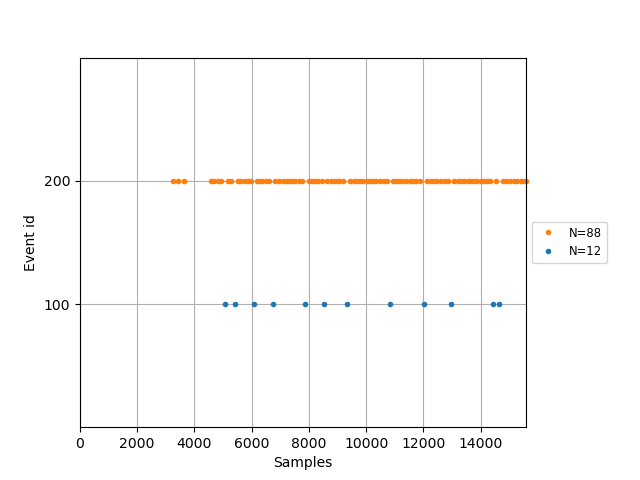

<IPython.core.display.Javascript object>


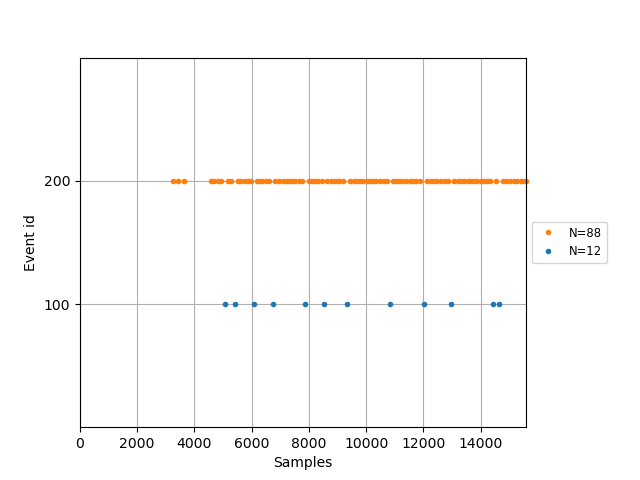

In [17]:
# Visualize events
mne.viz.plot_events(events[:100])

In [18]:
# Create event dictionary
event_ids = {'standard/stimulus': 200, 'target/stimulus': 100}

# Create epochs
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped


<IPython.core.display.Javascript object>


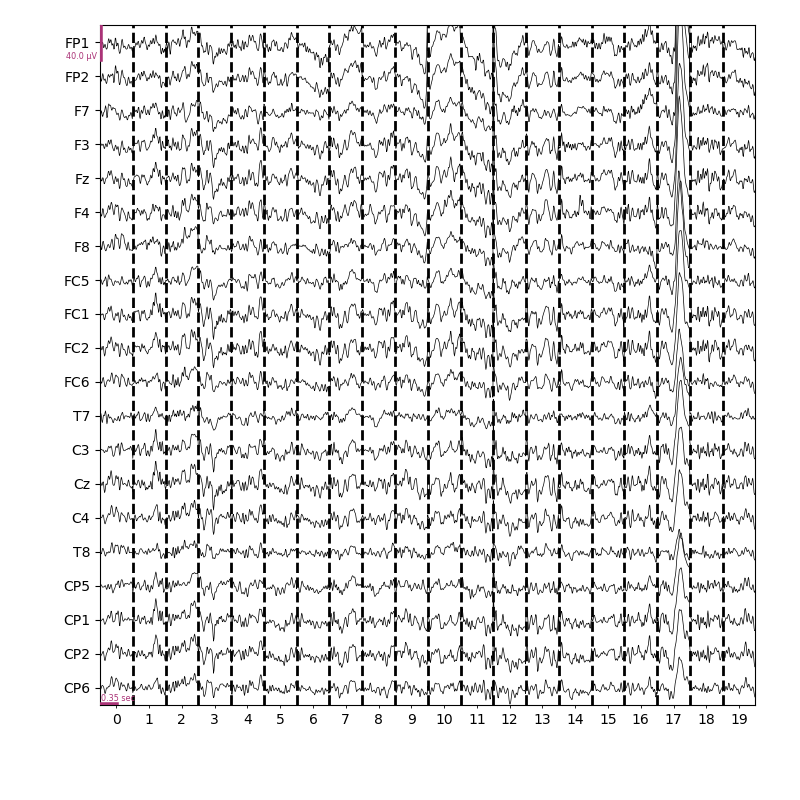

<IPython.core.display.Javascript object>


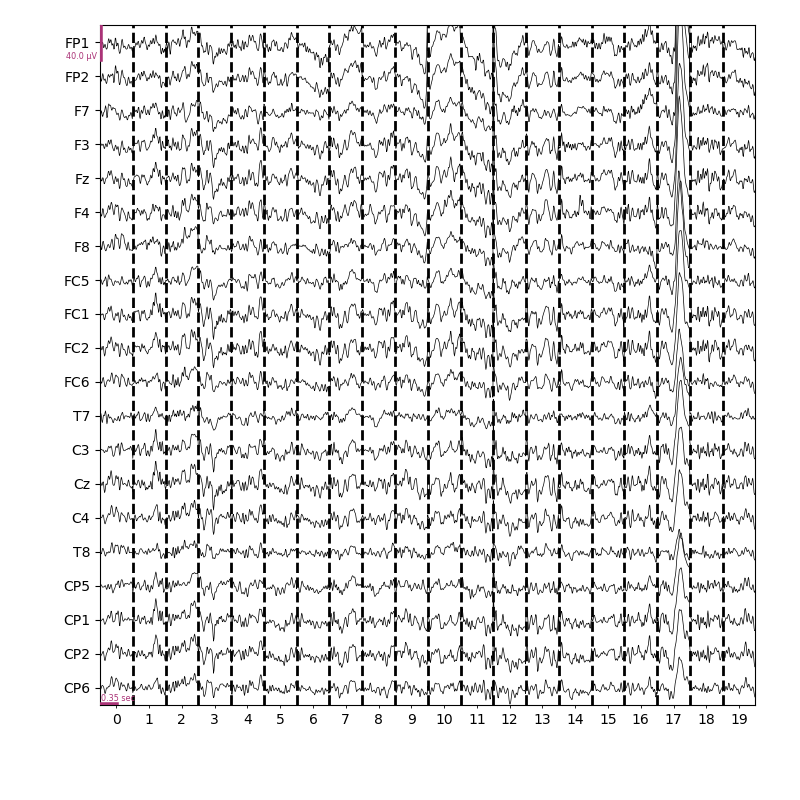

In [19]:
epochs.plot()

In [20]:
epochs =ica.apply(epochs, exclude=ica.exclude)

Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


C:\Users\eraym\AppData\Local\Temp/ipykernel_9588/2709909723.py:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs =ica.apply(epochs, exclude=ica.exclude)


In [21]:
# Baselining
epochs.apply_baseline((None,0))

Applying baseline correction (mode: mean)


<Epochs |  903 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~31.4 MB, data loaded,
 'standard/stimulus': 797
 'target/stimulus': 106>

In [22]:
epochs['target']

<Epochs |  106 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~3.7 MB, data loaded,
 'target/stimulus': 106>

In [23]:
# Observe how tags selected by '/' work
epochs['standard']

<Epochs |  797 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~27.7 MB, data loaded,
 'standard/stimulus': 797>

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


<IPython.core.display.Javascript object>


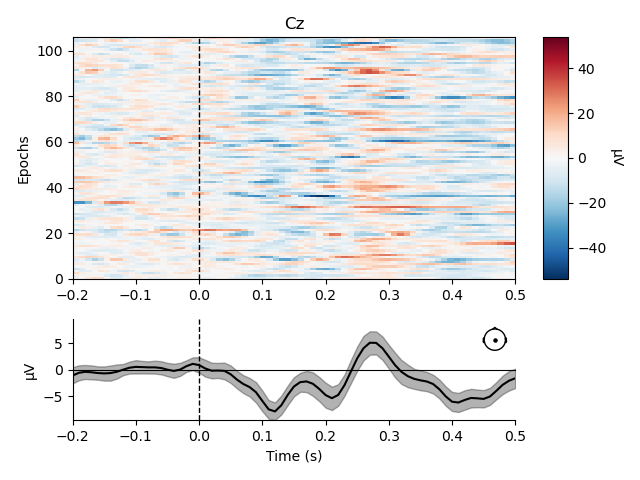

[<Figure size 640x480 with 4 Axes>]

In [24]:
# how does epoched activity look like ?
epochs['target'].plot_image(picks=[13])

In [25]:
# Ensure events are matched
epochs.equalize_event_counts(event_ids)
epochs

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<Epochs |  212 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~7.4 MB, data loaded,
 'standard/stimulus': 106
 'target/stimulus': 106>

In [26]:
# Save epochs to be not have to repeat preprocessing later
epochs.save('oddball-epo.fif')

In [28]:
# For data segmentation
epochs_for_tfr = mne.Epochs(raw, events, event_id=event_ids,
                           tmin=-.5, tmax=1.5, preload=True)

epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)

epochs_for_tfr.equalize_event_counts(event_ids)

epochs_for_tfr.save('oddball-long-epo.fif',overwrite=True)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 903 events and 201 original time points ...
0 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


C:\Users\eraym\AppData\Local\Temp/ipykernel_9588/2035751184.py:5: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_for_tfr = ica.apply(epochs_for_tfr, exclude=ica.exclude)


Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

<IPython.core.display.Javascript object>


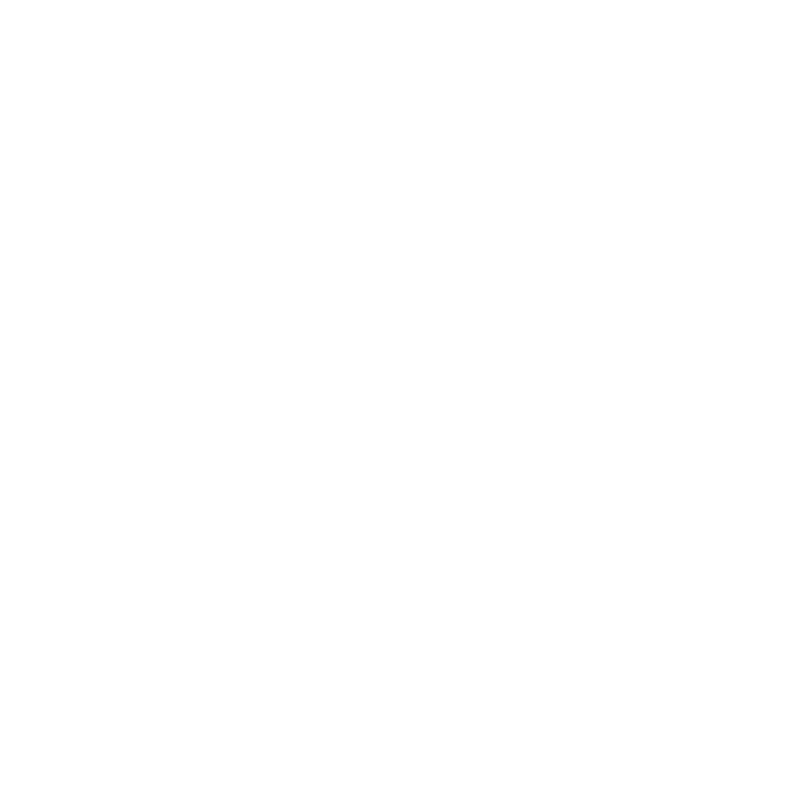

<IPython.core.display.Javascript object>


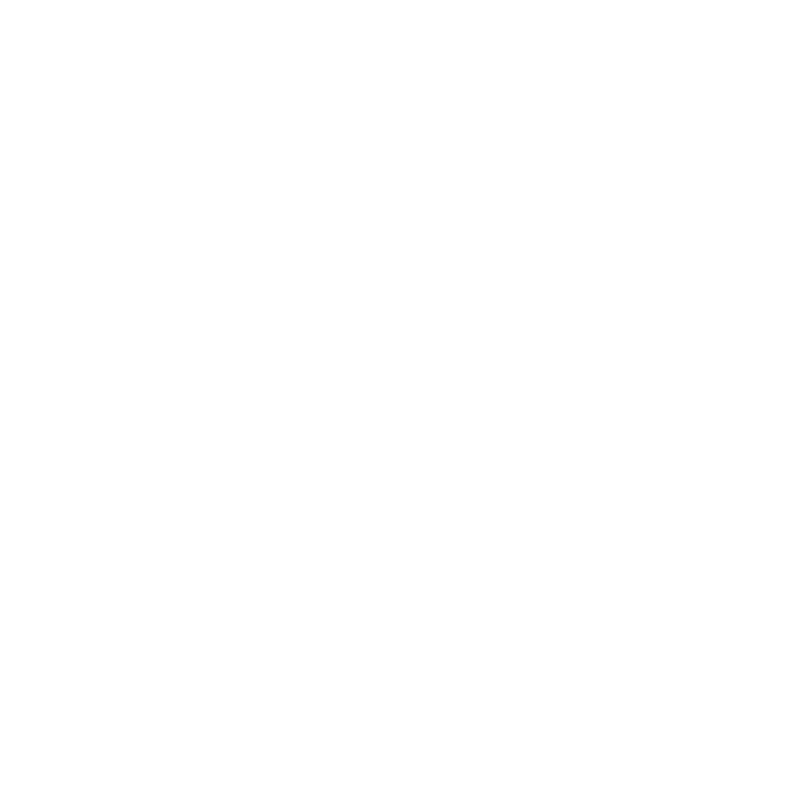

In [29]:
epochs_for_tfr.plot()